In [31]:
import speech_recognition as sr

def speech():
    required=-1
    er = "error"
    for index, name in enumerate(sr.Microphone.list_microphone_names()):
        if "pulse" in name:
            required= index
    r = sr.Recognizer()
    with sr.Microphone(device_index= 1) as source:
        r.adjust_for_ambient_noise(source)
        print("---------------")
        audio = r.listen(source, phrase_time_limit=4)
    try:
        input = r.recognize_google(audio)
        print("You said: " + input)
        return str(input)
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
        return er
    except sr.RequestError as e:
        print("Could not request results from Google Speech Recognition service; {0}".format(e))
        return er
    
def speecht():
    x = str(input())
    return x

In [32]:
def speech_to_text():
    out = speecht()
    if(out == "error"):
        for i in range(5):
            print("Attempting to retry-"+str(i))
            out = speecht()
            if(out != "error"):
                break             
    return out
        

In [33]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
def convertImage(imge):
    format_image = Image.open(imge)
    format_image.save(PATH+'\\Producer\\1.png')
    img = Image.open(PATH+'\\Producer\\1.png')
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
 
    img.putdata(newData)
    img.save(PATH+'\\Producer\\1.png', "PNG")
    print("Successful")

def adder():
    img = Image.open(PATH+'\\Producer\\1.png')
    background = Image.open(PATH+'\\Producer\\final.png').convert("RGBA")
    background.paste(img, (0, 0), img)
    background.save(PATH+'\\Producer\\final.png',"PNG")
    image1 = cv2.imread(PATH+'\\Producer\\final.png')
    plt.imshow(image1)

In [34]:
def faceshape():
    print("What is the face shape look alike ? Diamond or round or vshape \n")
    ui = speech_to_text()
    if (str.__contains__('DiamonddimonddamonddiamondDiamondmondshape ',ui)):
        convertImage(PATH+'\\Shape\\Diamondface.jpeg')
        adder()
    elif (str.__contains__('roundroundshapewoundoundroundground ',ui)):
        convertImage(PATH+'\\Shape\\roundface.jpeg')
        adder()
    elif (str.__contains__('vshapevweshapeushapeeshapeviewshape ',ui)):
        convertImage(PATH+'\\Shape\\vface.jpeg')
        adder()
    else:
        print("Step Skipped")

In [35]:
def hair():
    print("What does hair style look alike ? side style or forward or spike \n")
    ui = speech_to_text()
    if (str.__contains__('backwardbackspikebackbackwardhairstyle ',ui)):
        convertImage(PATH+'\\hair\\backwardhairstyle.jpeg')
        adder()
    elif (str.__contains__('nohairstylenoforwardstylerowhairstylesidestyle ',ui)):
        convertImage(PATH+'\\hair\\nohairstyle.jpeg')
        adder()
    elif (str.__contains__('sidehairstylesidecombsidestyle',ui)):
        convertImage(PATH+'\\hair\\sidehairstyle.jpeg')
        adder()
    else:
        print("Step Skipped")

In [36]:
def lips():
    print("What does lips look alike ? long or short \n")
    ui = speech_to_text()
    if (str.__contains__('longlipsbiglipslargelips ',ui)):
        convertImage(PATH+'\\lips\\longlips.jpeg')
        adder()
    elif (str.__contains__('smalllipsnormallipslowlipssmallmalllipshort ',ui)):
        convertImage(PATH+'\\lips\\normallips.jpeg')
        adder()
    else:
        print("Step Skipped")

In [37]:
def nose():
    print("What does nose look alike ? small or large \n")
    ui = speech_to_text()
    if (str.__contains__('largenosemediumnosevediumnosemediumsizenose ',ui)):
        convertImage(PATH+'\\nose\\mediumnose.jpeg')
        adder()
    elif (str.__contains__('smallnosesizesmallnoselittlenosesmallsized ',ui)):
        convertImage(PATH+'\\nose\\smallnose.jpeg')
        adder()
    else:
        print("Step Skipped")
        

In [38]:
def moustache():
    print("What does moustache look alike ? normal or curly \n")
    ui = speech_to_text()
    if (str.__contains__('beardbreedhighlowmediumbeard ',ui)):
        convertImage(PATH+'\\moustache\\beard.jpeg')
        adder()
    elif (str.__contains__('curlymoustachecurliedcurlybentupwardsmoustache ',ui)):
        convertImage(PATH+'\\moustache\\curlymoustache.jpeg')
        adder()
    elif (str.__contains__('normalmoustachelowmoustachelightlow',ui)):
        convertImage(PATH+'\\moustache\\normalmoustache.jpeg')
        adder()
    else:
        print("Step Skipped")

In [39]:
def mrgenerator():
    import tensorflow as tf
    from PIL import Image
    import os
    import time


    # Change PATH variable to absolute/ relative path to the images directory on your machine which contains the train and val folders
    PATH = './data' 
    EPOCHS = 50
    BUFFER_SIZE = 10
    BATCH_SIZE = 4
    IMG_WIDTH = 256
    IMG_HEIGHT = 256
    import tensorflow as tf
    def downs(filters, size, apply_batchnorm=True):
        initializer = tf.random_normal_initializer(0., 0.02)

        result = tf.keras.Sequential()
        result.add(
          tf.keras.layers.Conv2D(filters, size, strides=2, padding='same', 
                                 kernel_initializer=initializer, use_bias=False))

        if apply_batchnorm:
            result.add(tf.keras.layers.BatchNormalization())

        result.add(tf.keras.layers.LeakyReLU())

        return result

    def buildDiscriminator():
        initializer = tf.random_normal_initializer(0., 0.02)

        inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
        tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

        x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)

        down1 = downs(64, 4, False)(x) # (bs, 128, 128, 64)
        down2 = downs(128, 4)(down1) # (bs, 64, 64, 128)
        down3 = downs(256, 4)(down2) # (bs, 32, 32, 256)

        zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
        conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                    kernel_initializer=initializer,
                                    use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

        batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

        leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

        zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

        last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                    kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

        return tf.keras.Model(inputs=[inp, tar], outputs=last)

    discriminator = buildDiscriminator()

    OUTPUT_CHANNELS = 3
    import tensorflow as tf
    def downsample(filters, size, shape, apply_batchnorm=True):
        initializer = tf.random_normal_initializer(0., 0.02)

        result = tf.keras.Sequential()
        result.add(
          tf.keras.layers.Conv2D(filters, size, strides=2, padding='same', batch_input_shape=shape, 
                                 kernel_initializer=initializer, use_bias=False))

        if apply_batchnorm:
            result.add(tf.keras.layers.BatchNormalization())

        result.add(tf.keras.layers.LeakyReLU())

        return result

    def upsample(filters, size, shape, apply_dropout=False):
        initializer = tf.random_normal_initializer(0., 0.02)

        result = tf.keras.Sequential()
        result.add(
        tf.keras.layers.Conv2DTranspose(filters, size, strides=2, batch_input_shape=shape,
                                        padding='same',
                                        kernel_initializer=initializer,
                                        use_bias=False))

        result.add(tf.keras.layers.BatchNormalization())

        if apply_dropout:
            result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

        return result

    def buildGenerator():
        inputs = tf.keras.layers.Input(shape=[256,256,3])

        down_stack = [
            downsample(64, 4, (None, 256, 256, 3), apply_batchnorm=False), # (bs, 128, 128, 64)
            downsample(128, 4, (None, 128, 128, 64)), # (bs, 64, 64, 128)
            downsample(256, 4, (None, 64, 64, 128)), # (bs, 32, 32, 256)
            downsample(512, 4, (None, 32, 32, 256)), # (bs, 16, 16, 512)
            downsample(512, 4, (None, 16, 16, 512)), # (bs, 8, 8, 512)
            downsample(512, 4, (None, 8, 8, 512)), # (bs, 4, 4, 512)
            downsample(512, 4, (None, 4, 4, 512)), # (bs, 2, 2, 512)
            downsample(512, 4, (None, 2, 2, 512)), # (bs, 1, 1, 512)
        ]

        up_stack = [
            upsample(512, 4, (None, 1, 1, 512), apply_dropout=True), # (bs, 2, 2, 1024)
            upsample(512, 4, (None, 2, 2, 1024), apply_dropout=True), # (bs, 4, 4, 1024)
            upsample(512, 4, (None, 4, 4, 1024), apply_dropout=True), # (bs, 8, 8, 1024)
            upsample(512, 4, (None, 8, 8, 1024)), # (bs, 16, 16, 1024)
            upsample(256, 4, (None, 16, 16, 1024)), # (bs, 32, 32, 512)
            upsample(128, 4, (None, 32, 32, 512)), # (bs, 64, 64, 256)
            upsample(64, 4, (None, 64, 64, 256)), # (bs, 128, 128, 128)
        ]

        initializer = tf.random_normal_initializer(0., 0.02)
        last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                               strides=2,
                                               padding='same',
                                               kernel_initializer=initializer,
                                               activation='tanh') # (bs, 256, 256, 3)

        x = inputs

        skips = []
        for down in down_stack:
            x = down(x)
            skips.append(x)

        skips = reversed(skips[:-1])

        for up, skip in zip(up_stack, skips):
            x = up(x)
            x = tf.keras.layers.Concatenate()([x, skip])

        x = last(x)

        return tf.keras.Model(inputs=inputs, outputs=x)
    import tensorflow as tf
    def load(image_file):
        image = tf.io.read_file(image_file)
        image = tf.image.decode_png(image)

        w = tf.shape(image)[1]

        w = w // 2
        real_image = image[:, :w, :]
        input_image = image[:, w:, :]

        input_image = tf.cast(input_image, tf.float32)
        real_image = tf.cast(real_image, tf.float32)

        return input_image, real_image

    import datetime
    import tensorflow as tf
    log_dir="Sketch2Coloe_logs/"

    summary_writer = tf.summary.create_file_writer(
      log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

    import tensorflow as tf
    loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    LAMBDA = 100

    def generator_loss(disc_generated_output, gen_output, target):
        gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

        l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

        total_gen_loss = gan_loss + (LAMBDA * l1_loss)

        return total_gen_loss, gan_loss, l1_loss


    def discriminator_loss(disc_real_output, disc_generated_output):
        real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

        generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

        total_disc_loss = real_loss + generated_loss

        return total_disc_loss

    import tensorflow as tf
    generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

    import tensorflow as tf
    import pandas as pd
    import numpy as np
    import os
    import tensorflow as tf
    import cv2
    from tensorflow import keras
    from tensorflow.keras import layers, Input
    from tensorflow.keras.layers import Flatten
    from keras.layers.core import Dense
    from tensorflow.keras.layers import InputLayer
    from tensorflow.keras.models import Sequential, Model
    from  matplotlib import pyplot as plt
    import matplotlib.image as mpimg

    def resize(input_image, real_image, height, width):
        input_image = tf.image.resize(input_image, [height, width],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        real_image = tf.image.resize(real_image, [height, width],
                                   method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

        return input_image, real_image

    def random_crop(input_image, real_image):
        stacked_image = tf.stack([input_image, real_image], axis=0)
        cropped_image = tf.image.random_crop(
          stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

        return cropped_image[0], cropped_image[1]

    def normalize(input_image, real_image):
        input_image = (input_image / 127.5) - 1
        real_image = (real_image / 127.5) - 1

        return input_image, real_image

    @tf.function()
    def random_jitter(input_image, real_image):
        input_image, real_image = resize(input_image, real_image, 286, 286)
        input_image, real_image = random_crop(input_image, real_image)

        if tf.random.uniform(()) > 0.5:
            input_image = tf.image.flip_left_right(input_image)
            real_image = tf.image.flip_left_right(real_image)

        return input_image, real_image

    import tensorflow as tf
    def train_step(input_image, target, epoch):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            gen_output = generator(input_image, training=True)

            disc_real_output = discriminator([input_image, target], training=True)
            disc_generated_output = discriminator([input_image, gen_output], training=True)

            gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
            disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

        generator_gradients = gen_tape.gradient(gen_total_loss,
                                              generator.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss,
                                                   discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(generator_gradients,
                                              generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                                  discriminator.trainable_variables))

        with summary_writer.as_default():
            tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
            tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
            tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
            tf.summary.scalar('disc_loss', disc_loss, step=epoch)

    import tensorflow as tf
    import torch
    import pandas as pd


    def load_image_train(image_file):
        i = 0 ;
        input_image, real_image = load(image_file)
        input_image, real_image = random_jitter(input_image, real_image)
        input_image, real_image = normalize(input_image, real_image)
        i= i+1
        print("Processing-done----"+str(i))
        return input_image, real_image

    train_dataset = tf.data.Dataset.list_files(PATH+'\\TrainFiles\\*.png')
    train_dataset = train_dataset.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

    import tensorflow as tf
    from PIL import Image
    #Convert every image to be tested to png format
    format_image = Image.open(PATH+'\\val\\train.png')
    format_image.save(PATH+'\\val\\train.png')

    image1 = Image.open(PATH+'\\Design_stuff\\arrow.png')
    image2 = Image.open(PATH+'\\val\\train.png')
    image2 = image2.resize((512, 512))
    image1 = image1.resize((512, 512))
    image1_size = image1.size
    image2_size = image2.size
    new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
    new_image.paste(image1,(0,0))
    new_image.paste(image2,(image1_size[0],0))
    new_image.save(PATH+'\\Input_stuff\\tested.png',"PNG")

    def load_image_test(image_file):
        input_image, real_image = load(image_file)
        input_image, real_image = resize(input_image, real_image,
                                       IMG_HEIGHT, IMG_WIDTH)
        input_image, real_image = normalize(input_image, real_image)

        return input_image, real_image

    test_dataset = tf.data.Dataset.list_files(PATH+'\\Input_stuff\\*.png')
    test_dataset = test_dataset.map(load_image_test)
    test_dataset = test_dataset.batch(BATCH_SIZE)

    def generate_images(model, test_input, tar):
        prediction = model(test_input, training=True)
        plt.figure(figsize=(15,15))

        display_list = [test_input[0], tar[0], prediction[0]]
        title = ['Input Image', '', 'Predicted Image']
        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.title(title[i])
            plt.imshow(display_list[i] * 0.5 + 0.5)
            plt.axis('off')
        plt.show()

    from keras.models import load_model
    model = load_model('50epochsModel.h5')
    generator = model
    for example_input, example_target in test_dataset.take(5):
        generate_images(generator, example_input, example_target)

How do you give input ? Say Manually train or textInput 
text
You have Choosen Voice Input 
Please answer the questions Carefully ! 

What is the face shape look alike ? 

round
Successful
What does hair style look alike ? 

forward
Successful
What does nose look alike ? 

small
Successful
What does lips look alike ? 

large
Successful
What does moustache look alike ? 

small
Step Skipped
Do you want to predict real image ?
---------------
Google Speech Recognition could not understand audio
Processing-done----1


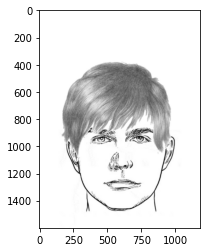

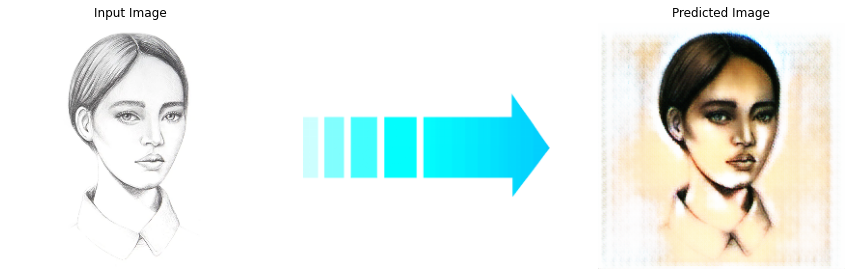

In [40]:
PATH = './ImageData'
def CodeRunner():
    print("How do you give input ? Say Manually train or textInput ")
    
    format_image = Image.open(PATH+'\\Producer\\final.jpeg')
    format_image.save(PATH+'\\Producer\\final.png')
    user_input = speech_to_text()
    if (str.__contains__('textinputtexttypetextinputtextkeyboard', user_input)):
        print("You have Choosen Voice Input ")
        print("Please answer the questions Carefully ! \n")
        faceshape()
        hair()
        nose()
        lips()
        moustache()
        print("Do you want to predict real image ?")
        ut= speecht()
        if(ut == "yes" or "yeah" or "s"):
            mrgenerator()
        
CodeRunner()